# Image Classification of Irrigation Pivots with Convolutional Networks

Link to access the dataset: https://drive.google.com/drive/folders/1_jfLD8yjmbEexfFnvn9yOcb6DmPkKAR9?usp=sharing

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 89.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import pandas as pd
from pylab import rcParams
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 18, 6
from sklearn.model_selection import train_test_split

Let's define the paths:

In [ ]:
path_train = '/content/drive/MyDrive/Datasets/Pivot_classification/train_dataset'
path_test = '/content/drive/MyDrive/Datasets/Pivot_classification/teste'

In [ ]:
class_list = os.listdir(path_train)

Let's list the classes we have in our dataset and import the images:

In [ ]:
print(class_list)

['pivot', 'not_pivot']


In [ ]:
Y = []
X = []
i = 0
for i in range(len(class_list)):
  path_class = os.path.join(path_train,class_list[i])
  img_list = os.listdir(path_class)
  for n in range(len(img_list)):
    path_img = os.path.join(path_class,img_list[n])
    src = rasterio.open(path_img)
    im = src.read()
    im = im.transpose([1,2,0])
    im = im.astype('uint8')
    im = cv2.resize(im,(224,224))
    print(str(n) + '_' + class_list[i])
    Y.append(i)
    X.append(im)

/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


0_pivot
1_pivot
2_pivot
3_pivot
4_pivot
5_pivot
6_pivot
7_pivot
8_pivot
9_pivot
10_pivot
11_pivot
12_pivot
13_pivot
14_pivot
15_pivot
16_pivot
17_pivot
18_pivot
19_pivot
20_pivot
21_pivot
22_pivot
23_pivot
24_pivot
25_pivot
26_pivot
27_pivot
28_pivot
29_pivot
30_pivot
31_pivot
32_pivot
33_pivot
34_pivot
35_pivot
36_pivot
37_pivot
38_pivot
39_pivot
40_pivot
41_pivot
42_pivot
43_pivot
44_pivot
45_pivot
46_pivot
47_pivot
48_pivot
49_pivot
50_pivot
51_pivot
52_pivot
53_pivot
54_pivot
55_pivot
56_pivot
57_pivot
58_pivot
59_pivot
60_pivot
61_pivot
62_pivot
63_pivot
64_pivot
65_pivot
66_pivot
67_pivot
68_pivot
69_pivot
70_pivot
71_pivot
72_pivot
73_pivot
74_pivot
75_pivot
76_pivot
77_pivot
78_pivot
79_pivot
80_pivot
81_pivot
82_pivot
83_pivot
84_pivot
85_pivot
86_pivot
87_pivot
88_pivot
89_pivot
90_pivot
91_pivot
92_pivot
93_pivot
94_pivot
95_pivot
96_pivot
97_pivot
98_pivot
99_pivot
100_pivot
101_pivot
102_pivot
103_pivot
104_pivot
105_pivot
106_pivot
107_pivot
108_pivot
109_pivot
110_pivot


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(2506, 224, 224, 3)
(2506,)


We plot an example:

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

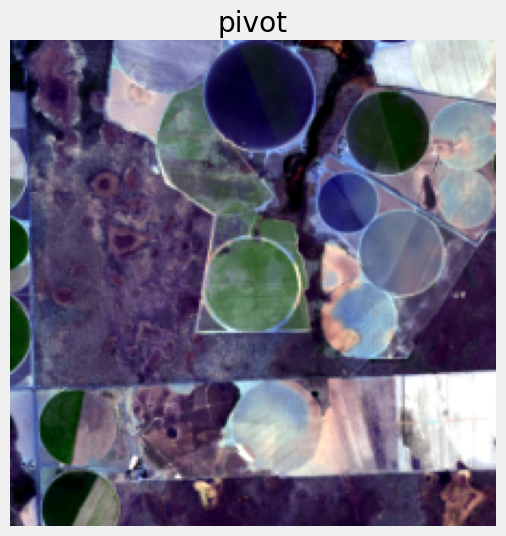

In [ ]:
i=100
plt.figure(figsize=[6,6])
plt.title(class_list[Y[i]])
plt.imshow(X[i,:,:,:])
plt.axis('off')

Let's split the data into training and testing:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation, ZeroPadding2D
from keras.regularizers import l2
#from tensorflow.keras.optimizers.legacy import Adam
from keras.optimizers import Adam

In [ ]:
Model = Sequential()
Model.add(Conv2D(32,(3,3), kernel_initializer="he_normal", padding='same', input_shape=(x_train.shape[1:])))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))
Model.add(BatchNormalization())
Model.add(Dropout(0.25))
Model.add(Conv2D(64,(3,3), kernel_initializer="he_normal", padding='same'))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))
Model.add(BatchNormalization())
Model.add(Dropout(0.25))
Model.add(Conv2D(128,(3,3), kernel_initializer="he_normal", padding='same'))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))
Model.add(Flatten())
Model.add(Dense(128))
Model.add(Activation('relu'))
Model.add(Dropout(0.25))
Model.add(Dense(32))
Model.add(Activation('relu'))
Model.add(Dense(1))
Model.add(Activation('sigmoid'))
Model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 1e-5), metrics=['accuracy'])
Model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,977 (49.37 MB)

 Trainable params: 12,942,785 (49.37 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
history = Model.fit(x = x_train, y= y_train, batch_size=32, epochs=50, verbose=1, shuffle=True, validation_split=0.25)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 225ms/step - accuracy: 0.6301 - loss: 0.9671 - val_accuracy: 0.5945 - val_loss: 0.6616
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7754 - loss: 0.5143 - val_accuracy: 0.7654 - val_loss: 0.5052
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8087 - loss: 0.4350 - val_accuracy: 0.8200 - val_loss: 0.4184
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8023 - loss: 0.4773 - val_accuracy: 0.7631 - val_loss: 0.4921
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8510 - loss: 0.3495 - val_accuracy: 0.7973 - val_loss: 0.4317
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8832 - loss: 0.2987 - val_accuracy: 0.8679 - val_loss: 0.3641
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8838 - loss: 0.2884 - val_accuracy: 0.7790 - val_loss: 0.4470
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8954 - loss: 0.2485 - val_accuracy: 0.8269 -

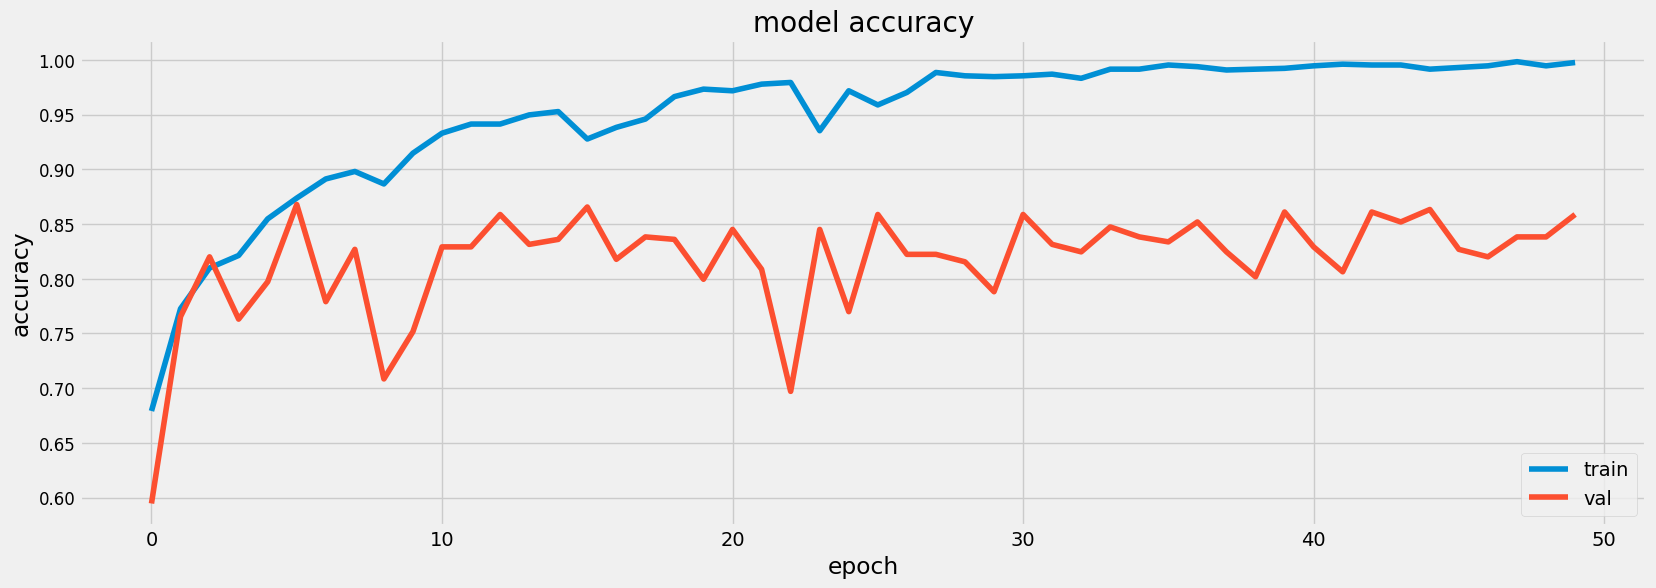

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

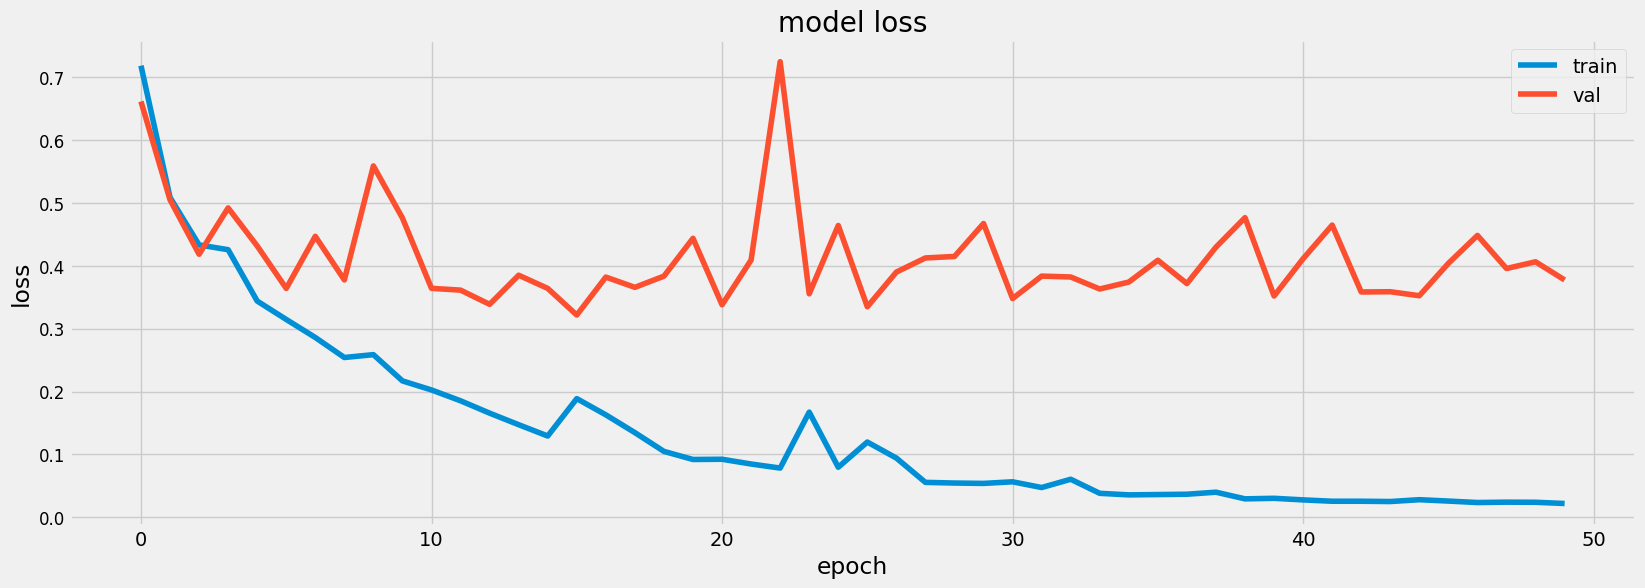

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()